# Identificar fronteras no lineales

In [14]:
from sklearn.datasets.samples_generator import make_circles, make_blobs

In [2]:
X, Y = make_circles(100, factor=.1, noise=.1)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [4]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Generamos la parrilla de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P,colors="k", levels=[-1,0,1], alpha=0.5, linestyles=["--","-", "--"])
    
    print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300, linewidth=1, facecolors="blue")
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

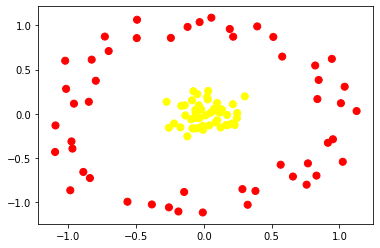

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

[[-0.38327158 -1.02242932]
 [-0.49445019  0.8547522 ]
 [ 1.0393449   0.30632181]
 [-1.02252411  0.59918202]
 [ 0.32361315 -1.02589153]
 [ 0.19171332  0.95732639]
 [-0.72995151  0.87166342]
 [ 1.12735781  0.03164471]
 [ 1.0116295   0.1199652 ]
 [ 0.84752877  0.38216734]
 [ 0.83126333 -0.69693806]
 [-0.03089152  1.03528618]
 [-0.18729712 -1.10159186]
 [ 0.38114586 -0.87029512]
 [-0.5631636  -0.99177576]
 [ 0.91544354 -0.32671808]
 [ 0.28501082 -0.84915056]
 [-0.25722357 -1.05520738]
 [-0.9578352   0.11488065]
 [-0.79687522  0.37333484]
 [ 0.39418284  0.98666854]
 [-1.09700771 -0.43037785]
 [-0.82706536  0.61161288]
 [ 1.02520616 -0.54107347]
 [ 0.6576553  -0.70744778]
 [-0.97615755 -0.31124799]
 [-0.24308733  0.85683215]
 [-0.9690731  -0.39217433]
 [ 0.05587367  1.08491619]
 [ 0.7681904  -0.55869631]
 [ 0.94482522  0.62032348]
 [ 0.56722155 -0.57414617]
 [ 0.21687046  0.8703052 ]
 [-1.09413992 -0.13100799]
 [-0.11966911  0.98099856]
 [-0.84019422 -0.72467275]
 [ 0.51294098  0.8678411 ]
 

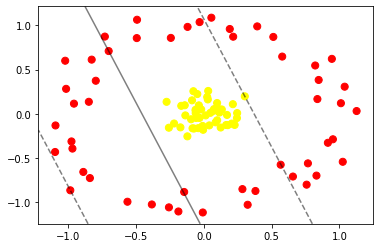

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))
r

array([0.30353486, 0.96803518, 0.98955722, 0.91051923, 0.92392281,
       0.94836738, 0.98514589, 0.97130921, 0.37716131, 0.30910605,
       0.98768713, 0.93975512, 0.24547144, 0.3143718 , 0.3854947 ,
       0.27454878, 0.28028817, 0.35423813, 0.42132242, 0.30828784,
       0.3420591 , 0.98751978, 0.28691053, 0.40547917, 0.27232137,
       0.98143415, 0.95336991, 0.38876448, 0.87762907, 0.99676739,
       0.95784008, 0.44830215, 0.30739351, 0.9963573 , 0.39429898,
       0.96143422, 0.99948434, 0.97304858, 0.99722922, 0.46098535,
       0.93469216, 0.96701609, 0.99146638, 0.32339043, 0.99748496,
       0.24941153, 0.94914865, 0.34711213, 0.26085041, 0.39337463,
       0.91315108, 0.93449754, 0.35002214, 0.98009913, 0.45237093,
       0.33524175, 0.30722804, 0.94181182, 0.99424002, 0.40565264,
       0.9842988 , 0.99463653, 0.9709621 , 0.96971496, 0.2787344 ,
       0.99689641, 0.97572442, 0.94117085, 0.52132371, 0.44732766,
       0.29691622, 0.99454853, 0.96402698, 0.37655962, 0.98134

In [8]:
from mpl_toolkits import mplot3d

In [9]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1], r, c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [10]:
from ipywidgets import interact, fixed

In [11]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150,180], 
         X=fixed(X), Y=fixed(Y), r=fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.38327158, -1.02242932],
       [-0.00491741, -0.180174  ],
       [-0.03630654,  0.09580981],
       [-0.2744885 ,  0.13563304],
       [-0.12102394, -0.25392904],
       [-0.17237525, -0.15264368],
       [ 0.09851392, -0.07252962],
       [-0.14048166,  0.09682624],
       [-0.49445019,  0.8547522 ],
       [ 1.0393449 ,  0.30632181],
       [ 0.10817529,  0.02621857],
       [ 0.24468988, -0.04756903],
       [-1.02252411,  0.59918202],
       [ 0.32361315, -1.02589153],
       [ 0.19171332,  0.95732639],
       [-0.72995151,  0.87166342],
       [ 1.12735781,  0.03164471],
       [ 1.0116295 ,  0.1199652 ],
       [ 0.84752877,  0.38216734],
       [ 0.83126333, -0.69693806],
       [-0.03089152,  1.03528618],
       [-0.0937602 , -0.06138223],
       [-0.18729712, -1.10159186],
       [ 0.38114586, -0.87029512],
       [-0.5631636 , -0.99177576],
       [-0.00903507, -0.13659696],
       [ 0.17742429, -0.12756534],
       [

In [12]:
# Radial Basis Function
rbf = SVC(kernel="rbf", C=1E6, gamma="auto")
rbf.fit(X,Y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

[[-0.24308733  0.85683215]
 [ 0.56722155 -0.57414617]
 [ 0.57854849  0.64607153]
 [ 0.83809757  0.16681768]
 [-0.84820605  0.13588034]
 [ 0.30260712  0.19738332]
 [-0.25760865 -0.15649831]]


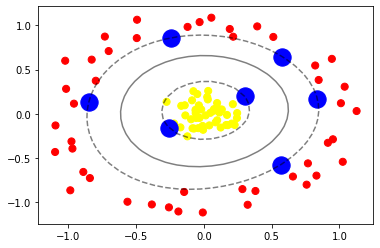

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="none")

## Ajustar los parámetros de SVM

In [24]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)

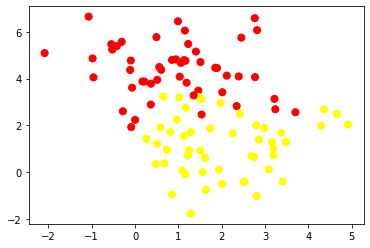

In [26]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

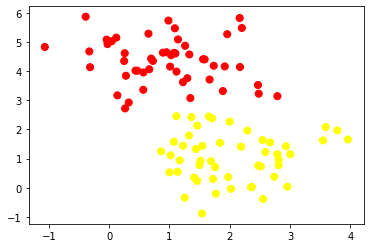

In [19]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

[[0.26604148 2.71915015]
 [2.79207378 3.14029479]
 [1.1167688  2.45256061]
 [1.36628697 2.42571562]]
[[0.26604148 2.71915015]
 [1.34880003 3.07479238]
 [1.88779063 3.31592667]
 [0.13742771 3.16777298]
 [2.79207378 3.14029479]
 [2.48279064 3.22558008]
 [2.47031647 3.52196502]
 [1.66781904 3.71005531]
 [0.32575305 2.92276125]
 [0.56762597 3.35928158]
 [3.59362114 2.08207549]
 [1.46361712 2.13207534]
 [2.29385806 1.95877238]
 [1.70714468 2.37707464]
 [2.00067424 2.26833784]
 [1.1167688  2.45256061]
 [1.65684156 2.4412893 ]
 [1.36628697 2.42571562]
 [1.32500974 1.79127669]
 [1.07491911 1.57315404]]


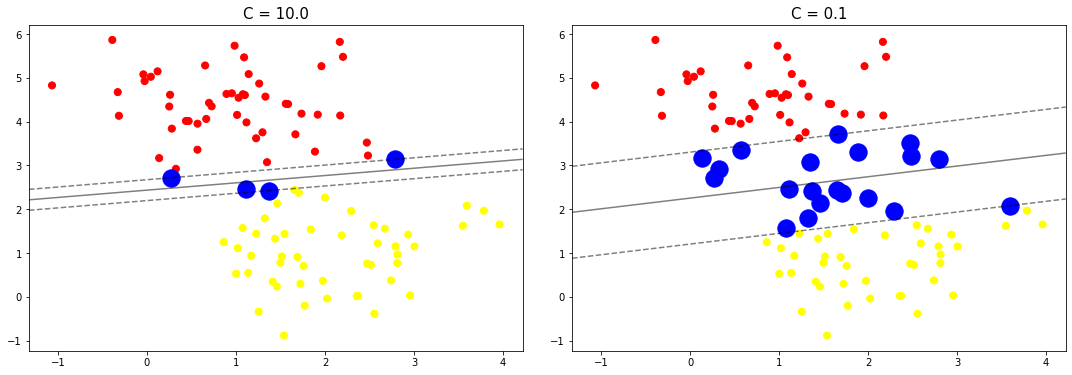

In [22]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size=15)